In [92]:
import numpy as np
import matplotlib.pyplot as plt

def rhc(max_iter=50, fitness_func=None, space=None, step=1, opt=0, **args):
    assert fitness_func is not None
    assert space is not None

    if max_iter > len(space): max_iter = len(space)

    idx = np.random.permutation(np.arange(len(space)))

    globalx = space[idx[0]]
    for i in range(max_iter):
        curr = space[idx[i]]
#         print("randomized search: {}|{}".format(i+1, max_iter))
        while True:
            maxx = curr
            left, right = find_neighbor(curr=curr, step=step)
            neighbors = check_inbound(left, right, space)
            if isinstance(curr, str):
                curr = convert_binary(curr, bits=args['bits'])
                maxx = convert_binary(maxx, bits=args['bits'])
                neighbors = [convert_binary(n, bits=args['bits']) for n in neighbors]
            for neighbor in neighbors:
                if fitness_func(neighbor)>fitness_func(curr):
                    maxx = neighbor     
            if is_equal(maxx, curr):
                if fitness_func(curr)>fitness_func(globalx):
                    globalx = curr
                break
            else:
#                 print("update {} to {}".format(curr, maxx))
                curr = maxx
                curr = rconvert_binary(curr)
        if isinstance(opt, str):
            if fitness_func(globalx) == fitness_func(opt):
                break
        else:
            if np.abs(globalx-opt) < 1e-6:
                break
    return i+1, globalx

def is_equal(i1, i2):
    if isinstance(i1, str):
        return i1==i2
    else:
        return np.abs(i1-i2) < 1e-6

def find_neighbor(curr=None, step=1):
    assert curr is not None
    
    if isinstance(curr, str):
        int_curr = int(curr,2)
        left = bin(int_curr-step)
        right = bin(int_curr+step)
    elif isinstance(curr, float):
        left = round(curr-step,1)
        right = round(curr+step,1)
    else:
        raise Exception("input type incorrect")
    
    return left, right

def check_inbound(left, right, space):
    results = []
    if isinstance(left, str):
        if left in space:
            results.append(left)
        if right in space:
            results.append(right)
    else:
        if np.any(np.abs(space-left)<1e-6): results.append(left)
        if np.any(np.abs(space-right)<1e-6): results.append(right)
#     print(left, right)
#     print(results)
    return results

def convert_binary(x, bits=10):
    return x[2:].zfill(bits)

def rconvert_binary(x):
    if isinstance(x, str): return bin(int(x,2))
    return x

def rhc_queen(max_iter=50, fitness_func=None, n=4, opt=100):
    chess = np.zeros([n,n])
    # initial position generation
    ipos = []
    for i in range(10000):
        irow, icol = np.random.randint(0,n), np.random.randint(0,n)
        if [irow, icol] not in ipos: ipos.append([irow, icol])
        if len(ipos) == n: break
    for pos in ipos:
        chess[pos[0],pos[1]] = 1

    for i in range(max_iter):
#         print("randomized search: {}|{}".format(i+1, max_iter))
        cur_score = fitness_func(chess)
        # find neighbor
        # randomly generate neighbor for a random queen
        new_chess = update_neighbor(chess)
        new_score = fitness_func(new_chess)
#         print(new_score, cur_score)
        if new_score > cur_score:
            chess = new_chess
        if fitness_func(chess) == opt:
            break
    return i+1, chess

def update_neighbor(x):
    n = len(x)
    pos_change = list(range(-int(n/2),int(n/2)+1))

    queens = np.where(x==1)
    # print(queens)
    queens = [[queens[0][i],queens[1][i]] for i in range(len(queens[0]))]

    cnt = 0
    while True:
        r = np.random.randint(0, len(queens))
        row, col = queens[r][0], queens[r][1]
        idx = [np.random.choice(pos_change), np.random.choice(pos_change)]
        if row+idx[0]<=n-1 \
            and row+idx[0]>=0 \
            and col+idx[1]<=n-1 \
            and col+idx[1]>=0 \
            and [row+idx[0], col+idx[1]] not in queens:
            queens[r] = [row+idx[0], col+idx[1]]
            cnt += 1
            if cnt==int(1): break
    # cnt = 0
    # while True:
    #     row, col = np.random.randint(0, len(queens)), np.random.randint(0, len(queens))
    #     if [row, col] not in queens: 
    #         queens.pop(-1)
    #         queens.append([row, col])
    #         cnt += 1
    #         if cnt==2: break
    chess = np.zeros([n,n])
    for q in queens:
        chess[q[0],q[1]] = 1

    return chess



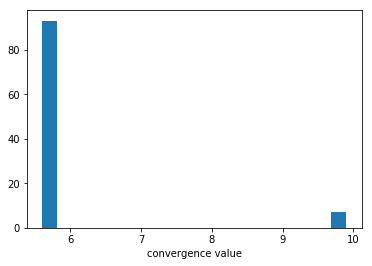

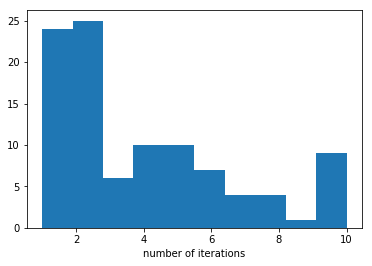

In [40]:

"""
polynomial problem
"""
def fitness_func(x):
    return (x-11)*(x-5)*(x-14)*(x-3)*(x-13)*(x-9)*(x-6.4)*(x-18)*(x-18.5)*(x-2.8)*(x-19.1)

space = np.arange(2.2,18,0.1)

iter_list = []
results = []
for i in range(100):
    iteration, result = rhc(max_iter=10, fitness_func=fitness_func, space=space, step=0.1, opt=5.6)
    iter_list.append(iteration)
    results.append(round(result,1))
#     print("x for global maximum value is: {}".format(result))
plt.hist(results, bins=20)
plt.xlabel("convergence value")
plt.show()

plt.hist(iter_list, bins=10)
plt.xlabel("number of iterations")
plt.show()

In [79]:
"""
alternation problem
"""
def fitness_func(x):
    if '0b' in x:
        x = x[2:].zfill(bits)
    cnt = 0
    curr = x[0]
    for i, char in enumerate(x):
        if i==0: continue
        if char != curr:
            cnt += 1
            curr = char
    return cnt

step = 1
lower = 0
upper = 1023 # binary for this is '11111111111111111111', 20 bits
bits=10
opt = '1010101010'

space = [bin(x) for x in np.arange(lower, upper, step)]

iter_list = []
results = []

for i in range(100):
    iteration, result = rhc(max_iter=100, fitness_func=fitness_func, space=space, step=1, bits=bits, opt=opt)
#     print("x for global maximum value is: {}".format(result))
    results.append(result)
    iter_list.append(iteration)

Text(0,0.5,'convergence value')

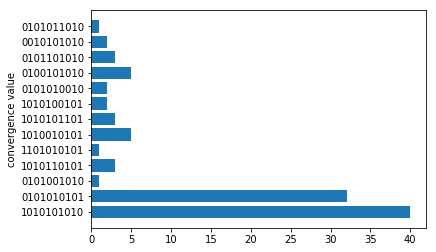

In [80]:
results_dict = {}
for r in results:
    if r in results_dict.keys():
        results_dict[r] += 1
    else:
        results_dict[r] =1
        
plt.barh(list(results_dict.keys()), list(results_dict.values()))
plt.ylabel("convergence value")

In [83]:
results_dict['1010101010']

40

Text(0.5,0,'number of iterations')

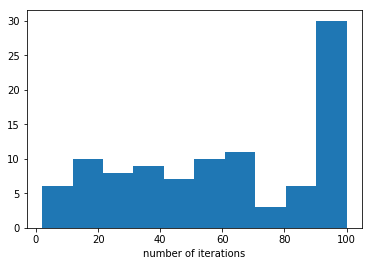

In [81]:
plt.hist(iter_list)
plt.xlabel("number of iterations")

In [100]:
"""
n - queens problem
"""
def fitness_func(x):
    n = len(x)
    score = 100
    # search queens
    queens = np.where(x==1)

    # check row conflicts
    score -= (len(queens[0]) - len(set(queens[0])))*2
    # check col conflicts
    score -= (len(queens[1]) - len(set(queens[1])))*2
    # check diagnal conflicts
    queens = [[queens[0][i],queens[1][i]] for i in range(len(queens[0]))]
    for pos in queens:
        search_se = [pos[0]+1, pos[1]+1]
        search_nw = [pos[0]-1, pos[1]-1]
        search_sw = [pos[0]+1, pos[1]-1]
        search_ne = [pos[0]-1, pos[1]+1]
        while True:
            # southeast
            if not np.all(np.isnan(search_se)):
                if search_se[0] > n-1 or search_se[1] > n-1: 
                    search_se = np.nan
                else:
                    if search_se in queens:
                        score -= 1
                    search_se = [search_se[0]+1, search_se[1]+1]
            # northwest
            if not np.all(np.isnan(search_nw)):
                if search_nw[0] < 0 or search_nw[1] < 0:
                    search_nw = np.nan
                else:
                    if search_nw in queens:
                        score -= 1
                    search_nw = [search_nw[0]-1, search_nw[1]-1]
            # southwest
            if not np.all(np.isnan(search_sw)):
                if search_sw[0] > n-1 or search_sw[1] < 0:
                    search_sw = np.nan
                else:
                    if search_sw in queens:
                        score -= 1
                    search_sw = [search_sw[0]+1, search_sw[1]-1]
            # northeast
            if not np.all(np.isnan(search_ne)):
                if search_ne[0] < 0 or search_ne[1] > n-1:
                    search_ne = np.nan
                else:
                    if search_ne in queens:
                        score -= 1
                    search_ne = [search_ne[0]-1, search_ne[1]+1]
            if np.all(np.isnan(search_se))\
            and np.all(np.isnan(search_nw))\
            and np.all(np.isnan(search_sw))\
            and np.all(np.isnan(search_ne)): break
    return score


iter_list = []
results = []
for i in range(100):
    print(i+1)
    iteration, chess = rhc_queen(max_iter=300, fitness_func=fitness_func, n=5)
#     print(chess)
    iter_list.append(iteration)
    results.append(chess)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


In [101]:
results = [fitness_func(r) for r in results]

Text(0.5,0,'fitness function result')

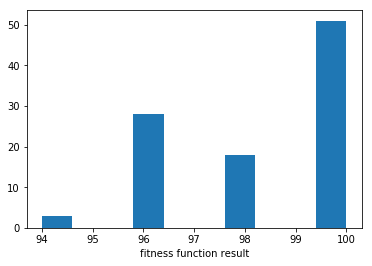

In [102]:
plt.hist(results)
plt.xlabel("fitness function result")

Text(0.5,0,'number of iterations')

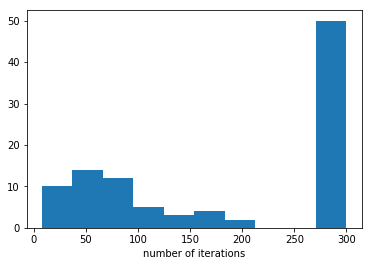

In [103]:
plt.hist(iter_list)
plt.xlabel("number of iterations")